In [76]:
#     This program is free software: you can redistribute it and/or modify
#     it under the terms of the GNU General Public License as published by
#     the Free Software Foundation, either version 3 of the License, or
#     (at your option) any later version.
#
#     This program is distributed in the hope that it will be useful,
#     but WITHOUT ANY WARRANTY; without even the implied warranty of
#     MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
#     GNU General Public License for more details.
#
#     You should have received a copy of the GNU General Public License
#     along with this program.  If not, see <https://www.gnu.org/licenses/>.

#     Written by Charalambos (Charis) Poullis - www.poullis.org

In [77]:
import numpy as np
#plotting etc
import matplotlib

import matplotlib.pyplot as plt
#random number generator
import random

# There is a weird crash in Python 3.9 causing the kernel to restart when using matplotlib
# To test if you have the same issue uncomment the following command. If it works, then you don't need the subsequent 2 lines (import os, KMP)
#plt.subplot()
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [78]:
def func(x):
    return pow(x,4.0)-2.5*pow(x, 3.0)+1.5*x

In [169]:
def gradientDescent():
    #Number of iterations
    EPOCHS = 10000
    #Step h
    h_step = 0.001
    #Update step
    update_step = 0.01
    #Initial values
    x = np.random.uniform(-1,4)
    #Keep track of all the updates
    x_updates = [x]
    print(f'Initial x: {x}, Initial eval: {func(x)}') 
    
    for i in range(EPOCHS):
        #Calculate the gradient
        eval_x = func(x) 
        eval_x_plus_h = func(x+h_step)
        gradient = (eval_x_plus_h - eval_x)/h_step
        #update the value of x
        x += -gradient * update_step
        #save the update
        x_updates.append(x)

        if i % 1000 == 0:
            print(f'x: {x}')
            print(f'eval: {func(x)}') 
        
    print(f'Optimal x: {x}, Final eval: {func(x)}') 
    return x_updates

In [170]:
x_updates = gradientDescent()

Initial x: 0.8555342744996324, Initial eval: 0.2535389290891059
x: 0.870401978663307
eval: 0.23101964178094114
x: 1.7524647718590418
eval: -1.394576312425209
x: 1.7524647718590773
eval: -1.3945763124252109
x: 1.7524647718590596
eval: -1.3945763124252126
x: 1.7524647718590418
eval: -1.394576312425209
x: 1.7524647718590773
eval: -1.3945763124252109
x: 1.7524647718590596
eval: -1.3945763124252126
x: 1.7524647718590418
eval: -1.394576312425209
x: 1.7524647718590773
eval: -1.3945763124252109
x: 1.7524647718590596
eval: -1.3945763124252126
Optimal x: 1.7524647718590596, Final eval: -1.3945763124252126


In [171]:
#Plot the function
x = np.linspace(-1, 2.5, 10000)
y = func(x)

0.870401978663307
0.8858651155536372
0.9019336806699689
0.9186154749959368
0.9359156993711064
0.9538365166499112
0.9723765855542914
0.991530572225368
1.0112886479378673
1.0316359842264249
1.052552259714306
1.0740111961103986
1.0959801439699772
1.118419741655106
1.1412836731752156
1.1645185518782468
1.188063956907726
1.2118526475548212
1.235810976783898
1.2598595190761235
1.2839139192786746
1.307885958565787
1.3316848213972658
1.3552185342752447
1.3783955341904046
1.4011263131273481
1.4233250761230436
1.4449113452738565
1.465811441599461
1.4859597811741803
1.5052999312637243
1.5237853856283716
1.541380034465623
1.5580583221325877
1.573805103166444
1.5886152226763222
1.6024928596855808
1.6154506806690132
1.6275088550559285
1.638693985025204
1.649037999036938
1.658577053018067
1.6673504758372153
1.6753997875507536
1.6827678106492843
1.689497886792171
1.6956332047073768
1.7012162392949075
1.706288297591683
1.7108891640954975
1.7150568358901235
1.7188273368968114
1.7222346002127291
1.725310

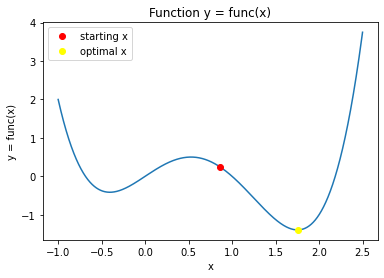

In [172]:
#Plot the loss as a function of epochs
fig, ax = plt.subplots(1,1)
#plot the function
ax.plot(x, y)
#Calculate the colors for the points
start_color = np.array([1.0, 0.0, 0.0])
end_color = np.array([1.0, 1.0, 0.0])
interpolated_colors = np.linspace(start_color, end_color, len(x_updates)).tolist()
for i in range(1, len(x_updates)-1):
    ax.plot(x_updates[i], func(x_updates[i]), color=interpolated_colors[i])

ax.plot(x_updates[0], func(x_updates[0]), 'o', color=start_color, label="starting x")
ax.plot(x_updates[-1], func(x_updates[-1]), 'o', color=end_color, label="optimal x")
ax.set_title('Function y = func(x)')
ax.set_xlabel('x')
ax.set_ylabel('y = func(x)')
ax.legend()
plt.show()
fig.savefig("function.png")